# Hostpial Data Visualization

In [9]:
# All libraries should be downloaded.
import pandas as pd
import matplotlib as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD


In [10]:
# Getting Hospital Data
import pandas as pd
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital;"
query_2 = "SELECT * FROM beds"
query_3 = "SELECT * FROM quality"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)
quality_df = pd.read_sql(query_3, conn)

conn.close()

<ipython-input-10-04b7f9cc0468>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-10-04b7f9cc0468>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)
<ipython-input-10-04b7f9cc0468>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quality_df = pd.read_sql(query_3, conn)


# `hospital` Data Frame Exploration

## Data Summary

In [12]:
import pandas as pd
import matplotlib as plt

hospital_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4996 entries, 0 to 4995
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hospital_pk    4996 non-null   object 
 1   hospital_name  4996 non-null   object 
 2   address        4996 non-null   object 
 3   city           4996 non-null   object 
 4   zip            4996 non-null   object 
 5   fips_code      4996 non-null   object 
 6   state          4996 non-null   object 
 7   latitude       4509 non-null   float64
 8   longitude      4509 non-null   float64
dtypes: float64(2), object(7)
memory usage: 351.4+ KB


<ipython-input-4-0d65e14e68ef>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


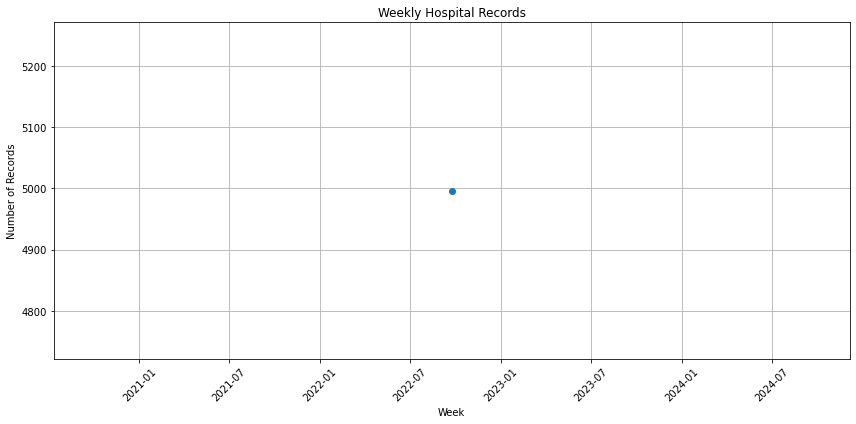

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])
weekly_counts = beds_df.groupby('collection_week').size().reset_index(name='record_count')
weekly_counts.sort_values('collection_week', inplace=True)

plt.figure(figsize=(12, 6))
plt.plot(weekly_counts['collection_week'], weekly_counts['record_count'], marker='o')
plt.xlabel('Week')
plt.ylabel('Number of Records')
plt.title('Weekly Hospital Records')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()  
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

weekly_summary = beds_df.groupby('collection_week').agg({
    'all_adult_hospital_beds_7_day_avg': 'sum',
    'all_pediatric_inpatient_beds_7_day_avg': 'sum',
    'all_adult_hospital_inpatient_bed_occupied_7_day_coverage': 'sum',
    'all_pediatric_inpatient_bed_occupied_7_day_avg': 'sum',
    'inpatient_beds_used_covid_7_day_avg': 'sum'
}).reset_index()

weekly_summary.sort_values('collection_week', ascending=False, inplace=True)
comparison_weeks = weekly_summary.head(5)
comparison_weeks

<ipython-input-5-a41a827fd1ce>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


,collection_week,all_adult_hospital_beds_7_day_avg,all_pediatric_inpatient_beds_7_day_avg,all_adult_hospital_inpatient_bed_occupied_7_day_coverage,all_pediatric_inpatient_bed_occupied_7_day_avg,inpatient_beds_used_covid_7_day_avg
0,2022-09-23,-10586399.5,-430959964.5,34832.0,-634971586.9,-1.914972e+09


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"
query_3 = "SELECT * FROM quality"

beds_df = pd.read_sql(query_2, conn)
quality_df = pd.read_sql(query_3, conn)

conn.close()

merged_df = pd.merge(beds_df, quality_df, left_on='hospital_pk', right_on='facility_id')

merged_df['total_beds'] = merged_df['all_adult_hospital_beds_7_day_avg'] + merged_df['all_pediatric_inpatient_beds_7_day_avg']
merged_df['beds_in_use'] = merged_df['all_adult_hospital_inpatient_bed_occupied_7_day_coverage'] + merged_df['all_pediatric_inpatient_bed_occupied_7_day_avg']

merged_df['fraction_beds_in_use'] = merged_df['beds_in_use'] / merged_df['total_beds']

quality_bed_usage = merged_df.groupby('quality_rating')['fraction_beds_in_use'].mean().reset_index()

quality_bed_usage

<ipython-input-11-512895399a4f>:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)
<ipython-input-11-512895399a4f>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  quality_df = pd.read_sql(query_3, conn)


,quality_rating,fraction_beds_in_use
0,1.0,NaN
1,2.0,NaN
2,3.0,NaN
3,4.0,NaN
4,5.0,-379.261089


<ipython-input-12-b211392e5ea2>:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


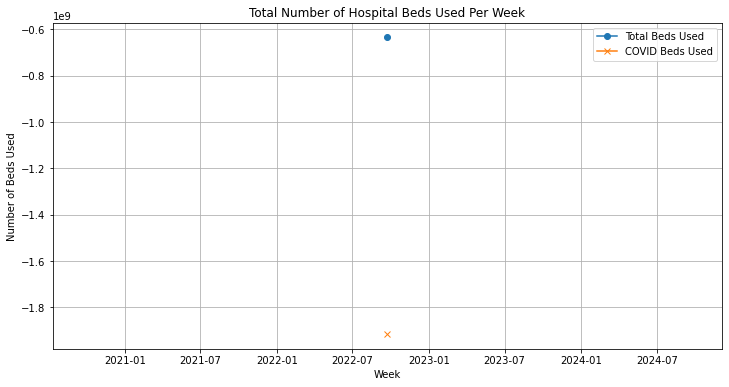

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_2 = "SELECT * FROM beds"

beds_df = pd.read_sql(query_2, conn)

conn.close()

beds_df['collection_week'] = pd.to_datetime(beds_df['collection_week'])

weekly_beds_usage = beds_df.groupby('collection_week').agg({
    'all_adult_hospital_inpatient_bed_occupied_7_day_coverage': 'sum',
    'all_pediatric_inpatient_bed_occupied_7_day_avg': 'sum',
    'inpatient_beds_used_covid_7_day_avg': 'sum'
}).reset_index()

weekly_beds_usage['total_beds_used'] = (weekly_beds_usage['all_adult_hospital_inpatient_bed_occupied_7_day_coverage'] +
                                        weekly_beds_usage['all_pediatric_inpatient_bed_occupied_7_day_avg'])

plt.figure(figsize=(12, 6))
plt.plot(weekly_beds_usage['collection_week'], weekly_beds_usage['total_beds_used'], label='Total Beds Used', marker='o')
plt.plot(weekly_beds_usage['collection_week'], weekly_beds_usage['inpatient_beds_used_covid_7_day_avg'], label='COVID Beds Used', marker='x')
plt.xlabel('Week')
plt.ylabel('Number of Beds Used')
plt.title('Total Number of Hospital Beds Used Per Week')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-18-b2c0bb780349>:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  hospital_df = pd.read_sql(query_1, conn)
<ipython-input-18-b2c0bb780349>:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  beds_df = pd.read_sql(query_2, conn)


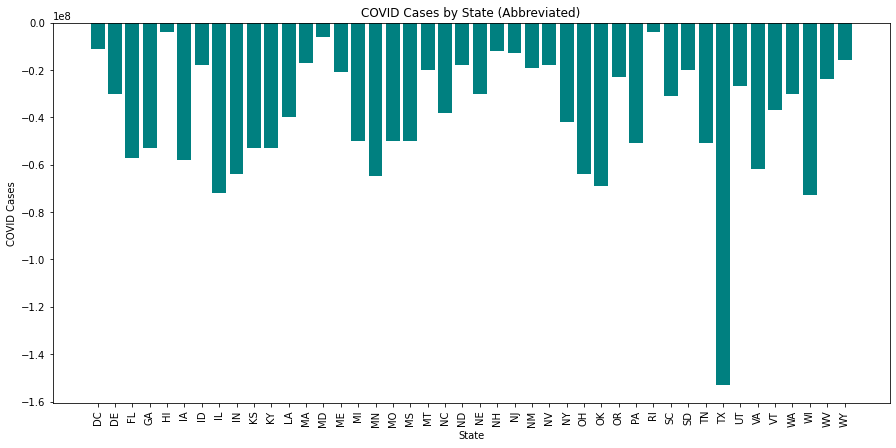

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital"
query_2 = "SELECT * FROM beds"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)

conn.close()

state_code_to_abbrev = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR',
    '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE',
    '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI',
    '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA',
    '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME',
    '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN',
    '28': 'MS', '29': 'MO', '30': 'MT', '31': 'NE',
    '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM',
    '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI',
    '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX',
    '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA',
    '54': 'WV', '55': 'WI', '56': 'WY'
}

hospital_df['state_code'] = hospital_df['fips_code'].str[:2]

merged_data = pd.merge(beds_df, hospital_df[['hospital_pk', 'state_code']], on='hospital_pk')

merged_data['state_abbrev'] = merged_data['state_code'].map(state_code_to_abbrev)

statewise_covid_cases = merged_data.groupby('state_abbrev')['inpatient_beds_used_covid_7_day_avg'].sum().reset_index()

plt.figure(figsize=(15, 7))
plt.bar(statewise_covid_cases['state_abbrev'], statewise_covid_cases['inpatient_beds_used_covid_7_day_avg'], color='teal')
plt.xlabel('State')
plt.ylabel('COVID Cases')
plt.title('COVID Cases by State (Abbreviated)')
plt.xticks(rotation=90) 
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg
from credentials import DBNAME, USER, PASSWORD

conn = psycopg.connect(
    host="pinniped.postgres.database.azure.com",
    dbname=DBNAME, user=USER, password=PASSWORD
)

query_1 = "SELECT * FROM hospital"
query_2 = "SELECT * FROM beds"

hospital_df = pd.read_sql(query_1, conn)
beds_df = pd.read_sql(query_2, conn)

conn.close()